In [23]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [24]:
skeleton_img = cv2.imread('salt-and-pepper-Skeleton.png', cv2.IMREAD_GRAYSCALE)

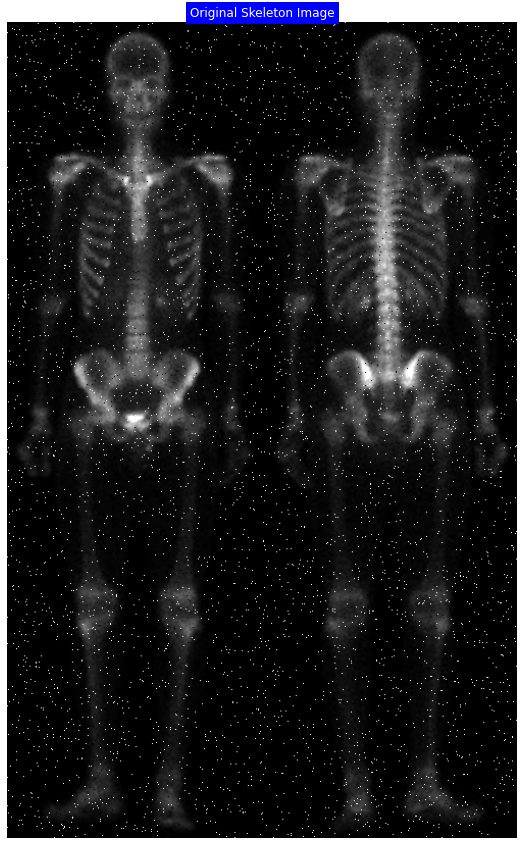

In [25]:
plt.figure(figsize=(20,15))
## disable x & y axis
plt.axis('off')
plt.title('Original Skeleton Image', color='white', backgroundcolor='blue')
plt.imshow(skeleton_img, cmap = 'gray', vmin=0, vmax=2**(skeleton_img.itemsize*8)-1)

### 1. Eliminate noise

#### The noise can be eliminated by applying median filter

In [26]:
median_filtered_img = cv2.medianBlur(skeleton_img, 3)

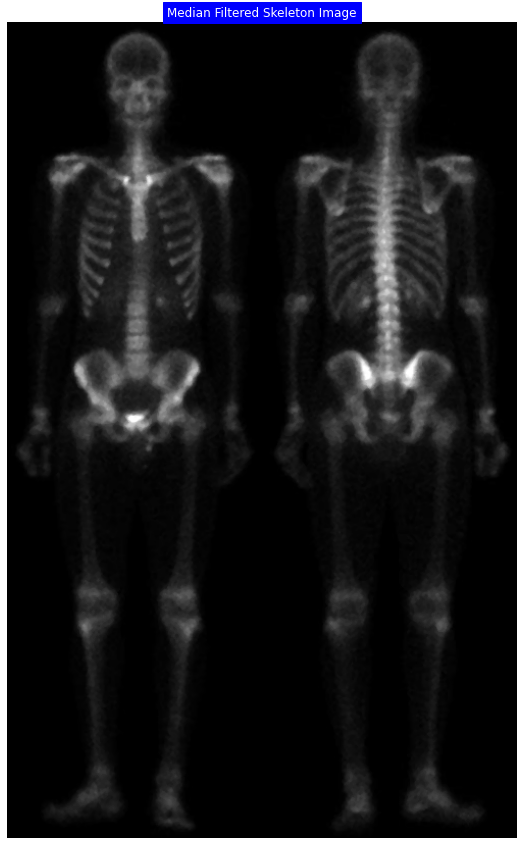

In [27]:
plt.figure(figsize=(20,15))
## disable x & y axis
plt.axis('off')
plt.title('Median Filtered Skeleton Image', color='white', backgroundcolor='blue')
plt.imshow(median_filtered_img, cmap = 'gray', vmin=0, vmax=2**(median_filtered_img.itemsize*8)-1)

### 2. 

In [28]:
def perform_correlation(img, kernel):
    pad = int((kernel.shape[0] - 1)/2)
    padded_img = np.pad(img, pad, mode = 'edge')
    corr_img = np.zeros(img.shape, dtype=np.float64)
    x_radius, y_radius = (kernel.shape[0] - 1) // 2, (kernel.shape[1] - 1) // 2
    # apply kernel
    for i in range(x_radius, padded_img.shape[0] - x_radius):
        for j in range(y_radius, padded_img.shape[1] - y_radius):
            covered_area = padded_img[i-x_radius:i+x_radius+1, j-y_radius:j+y_radius+1]
            corr_img[i-x_radius, j-y_radius] = np.sum(np.multiply(covered_area, kernel))
    return corr_img

### Sharpen

In [29]:
# Sharpen
kernel = np.array([[-1, -1, -1],
                   [-1, 9, -1],
                   [-1, -1, -1]])

# ddepth = -1, so the result (destination) image will have the same depth as the input (source) image.
sharpened_img = cv2.filter2D(src=median_filtered_img, ddepth=-1, kernel=kernel)
# # normalize intensity values by mapping the most negative value to zero and shift the rest based on it
# sharpened_img = (sharpened_img - np.min(sharpened_img)) / (np.max(sharpened_img) - np.min(sharpened_img)) * 255
# sharpened_img = sharpened_img.astype(np.uint8)

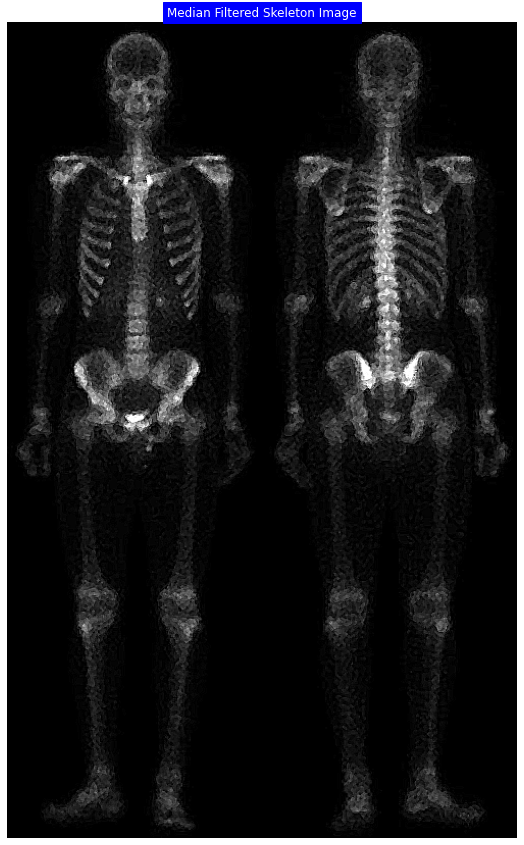

In [30]:
plt.figure(figsize=(20,15))
## disable x & y axis
plt.axis('off')
plt.title('Median Filtered Skeleton Image', color='white', backgroundcolor='blue')
plt.imshow(sharpened_img, cmap = 'gray')

In [31]:
# Laplacian
# kernel = np.array([[-1, -1, -1],
#                    [-1, 8, -1],
#                    [-1, -1, -1]])

# kernel = np.array([[0, 1, 0],
#                    [1, -4, 1],
#                    [0, 1, 0]])

kernel = np.array([[0, -1, 0],
                   [-1, 4, -1],
                   [0, -1, 0]])

# kernel = np.array([[1, 1, 1],
#                    [1, -8, 1],
#                    [1, 1, 1]])

# laplacian_img =  perform_correlation(median_filtered_img, kernel)
laplacian_img = cv2.filter2D(src=median_filtered_img, ddepth=-1, kernel=kernel)
# # normalize intensity values by mapping the most negative value to zero and shift the rest based on it
# laplacian_img = (laplacian_img - np.min(laplacian_img)) / (np.max(laplacian_img) - np.min(laplacian_img)) * 255
# laplacian_img = laplacian_img.astype(np.uint8)

### Laplacian

In [32]:
kernel = np.array([[-1, -1, -1],
                   [-1, 8, -1],
                   [-1, -1, -1]])

In [33]:
laplacian_img = cv2.Laplacian(median_filtered_img,cv2.CV_64F)
# laplacian_img = laplacian_img.astype(median_filtered_img.dtype)

In [34]:
# normalize intensity values by mapping the most negative value to zero and shift the rest based on it
laplacian_img = (laplacian_img - np.min(laplacian_img)) / (np.max(laplacian_img) - np.min(laplacian_img)) * 255
laplacian_img = laplacian_img.astype(np.uint8)

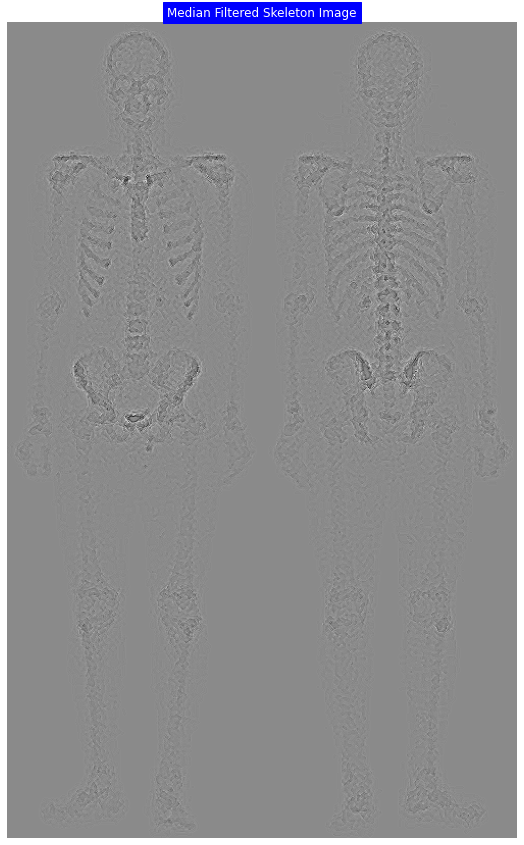

In [35]:
plt.figure(figsize=(20,15))
## disable x & y axis
plt.axis('off')
plt.title('Median Filtered Skeleton Image', color='white', backgroundcolor='blue')
plt.imshow(laplacian_img, cmap = 'gray', vmin=0, vmax=2**(laplacian_img.itemsize*8)-1)

### 2.

### Sobelx

In [36]:
sobelx_kernel = np.array([[-1, 0, 1],
                          [-2, 0, 2],
                          [-1, 0, 1]])

sobelx_img = cv2.filter2D(src=median_filtered_img, ddepth=-1, kernel=sobelx_kernel)

In [37]:
sobelx_img = sobelx_img + sharpened_img

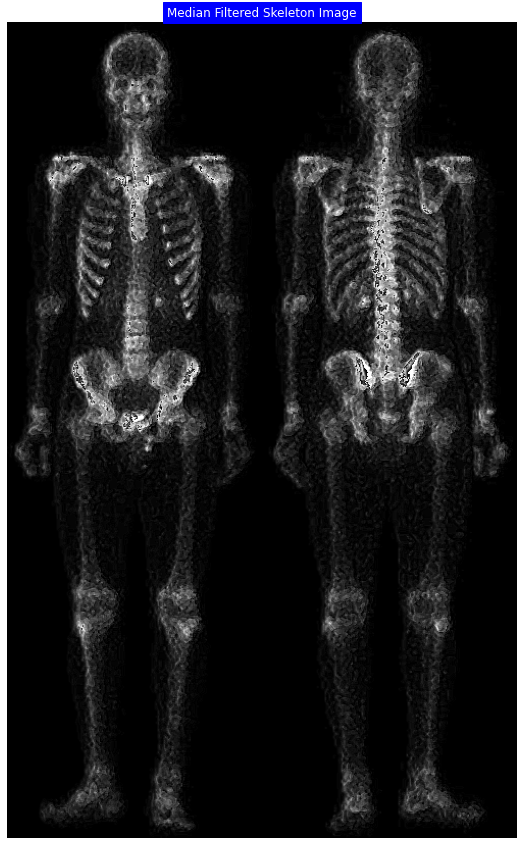

In [38]:
plt.figure(figsize=(20,15))
## disable x & y axis
plt.axis('off')
plt.title('Median Filtered Skeleton Image', color='white', backgroundcolor='blue')
plt.imshow(sobelx_img, cmap = 'gray', vmin=0, vmax=2**(sobelx_img.itemsize*8)-1)

### 3.

### Sobely

In [119]:
sobely_kernel = np.array([[-1, -2, -1],
                          [0 , 0 , 0], 
                          [1, 2, 1]])

sobely_img = cv2.filter2D(src=median_filtered_img, ddepth=-1, kernel=sobely_kernel)

In [120]:
sobely_img = sobely_img + sharpened_img

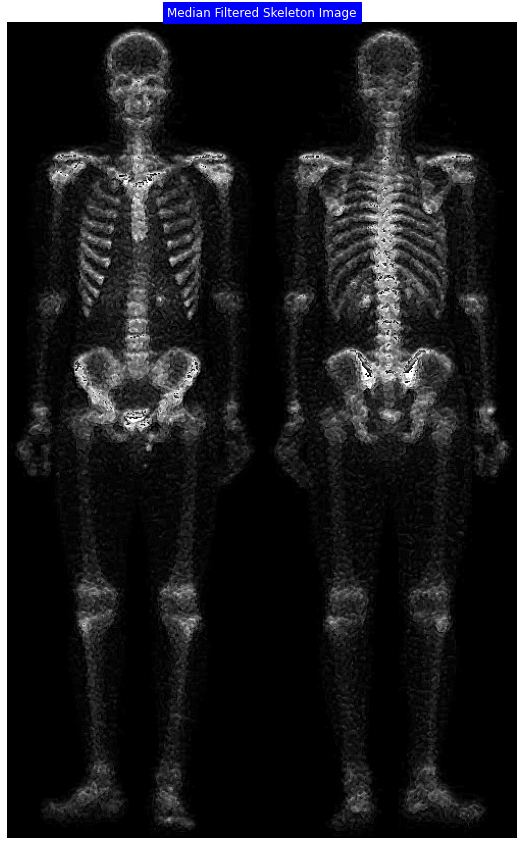

In [121]:
plt.figure(figsize=(20,15))
## disable x & y axis
plt.axis('off')
plt.title('Median Filtered Skeleton Image', color='white', backgroundcolor='blue')
plt.imshow(sobely_img, cmap = 'gray', vmin=0, vmax=2**(sobely_img.itemsize*8)-1)

### 4.

### Power law

In [122]:
def power_law(_img, gamma, _plot=True):
    n_bytes = _img.itemsize
    c = (2**(n_bytes*8)-1)**(1-gamma)
    transformed_img = np.zeros(shape=_img.shape, dtype=_img.dtype)
    # Perform power law
    transformed_img = (c*(_img)**gamma).astype(_img.dtype)
    return transformed_img

In [177]:
dst = power_law(sobely_img, 0.65)

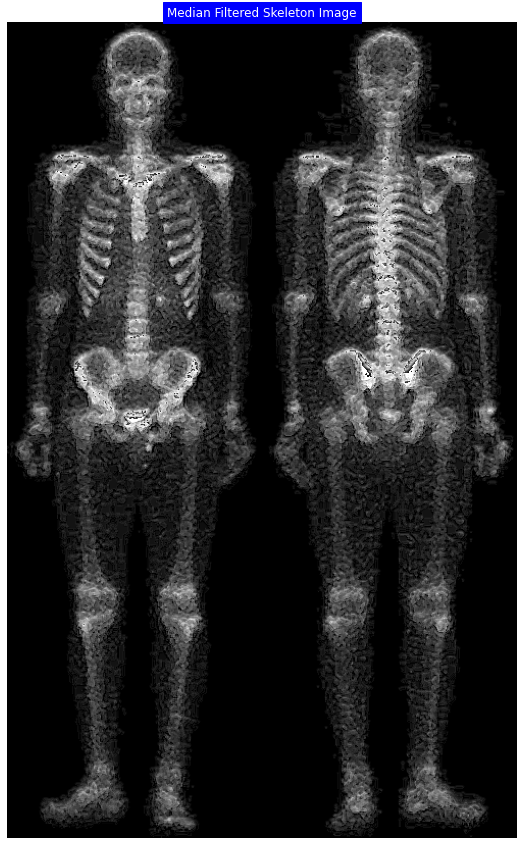

In [178]:
plt.figure(figsize=(20,15))
## disable x & y axis
plt.axis('off')
plt.title('Median Filtered Skeleton Image', color='white', backgroundcolor='blue')
plt.imshow(dst, cmap = 'gray', vmin=0, vmax=2**(dst.itemsize*8)-1)